##### Initialization

In [1]:
import numpy as np
from UAV import *
import random
from sklearn.manifold import MDS
import matplotlib.pyplot as plt   


n_robots = 10#int(input("number of robots: "))
platoon = []


# initialization of n robots
for i in range(n_robots):
    #if i==0:
    #    i_robot = Robot("op_" + str(i),0,0,0)
    #else:
    i_robot = Robot("op_" + str(i),random.uniform(0, 10.0),random.uniform(0, 10.0),0)
    platoon.append(i_robot)

coordinates = [[],[],[]]

for rob in platoon:
    coordinates = np.append(coordinates,rob.get_coords(),axis=1)

#TRUE COORDINATES [REALITY: THEY ARE UNKNOWN]
S = coordinates[0:2,:]
print(S)

[[9.04968562 4.76636371 3.1947396  9.72881318 0.93089039 9.60680595
  0.60791067 3.32710354 0.21646629 0.37063749]
 [2.60339181 7.59270767 9.60729627 9.68698812 6.91020902 8.24789468
  0.68675271 6.14839708 7.64850849 8.31811911]]


##### Distance matrix definition: DM

In [2]:
#It will be fed into the MDS algorithm
DM  = d_matrix(platoon)  #distance matrix -> for sktlearn
DM2 = d_matrix2(platoon) #squared distance matrix -> for formulas

##### S* definition (estimated coordinates w/ MDS algorithm)

In [3]:
#SKTLEARN MDS: DIMENSIONALITY REDUCTION
n_components = 2
embedding = MDS(n_components=2,
                n_init = 50,
                max_iter = 10000,
                eps=1e-5,
                dissimilarity='precomputed') 

#ESTIMATED COORDINATES (MAY BE AFFECTED BY FLIP AND ROTATION)
S_star = embedding.fit_transform(DM).T
print(S_star)

[[ 2.73397636 -0.96772254 -2.50763672 -4.28210045  0.68471123 -2.86223925
   6.77933491  0.79617346  0.15615939 -0.5306564 ]
 [-5.77826393 -0.34662885  1.69447392 -4.59412163  3.18235108 -4.84898051
   1.86847388  0.6711606   4.06345874  4.08807671]]


##### S' definition (to overcome rotation and flip ambiguities)

In [4]:
#FIRST DISPLACEMENT
deltaX1 = deltaY1 = 0.1

deltaSprime = np.array([[0 for i in range(n_robots)] for j in range(2)],dtype=float)
deltaSprime[:,0] = [deltaX1,deltaY1]

Sprime = S + deltaSprime
print(Sprime)

[[9.14968562 4.76636371 3.1947396  9.72881318 0.93089039 9.60680595
  0.60791067 3.32710354 0.21646629 0.37063749]
 [2.70339181 7.59270767 9.60729627 9.68698812 6.91020902 8.24789468
  0.68675271 6.14839708 7.64850849 8.31811911]]


##### DM' definition (new distance matrix from S' coordinates)

In [5]:
DM_prime = DM_from_S(Sprime,verbose=1)

DM' :
 [[  0.          43.11892061  83.12527903  49.10600618  85.24590614
   30.95047114  77.02875257  45.77052345 104.25658663 108.5968488 ]
 [ 43.11892061   0.           6.52856958  29.01191539  15.17665997
   23.8591511   64.98494551   4.1575029   20.70468021  19.84863073]
 [ 83.12527903   6.52856958   0.          42.70046839  12.39929288
   42.96256754  86.26778129  11.98150382  12.70696144   9.63753046]
 [ 49.10600618  29.01191539  42.70046839   0.          85.11394762
    2.08587568 164.19509999  53.50351286  94.64014252  89.44925462]
 [ 85.24590614  15.17665997  12.39929288  85.11394762   0.
   77.06091368  38.8357243    6.32219489   1.0554879    2.29609414]
 [ 30.95047114  23.8591511   42.96256754   2.08587568  77.06091368
    0.         138.15098408  43.84255248  88.53774261  85.31173921]
 [ 77.02875257  64.98494551  86.26778129 164.19509999  38.8357243
  138.15098408   0.          37.22356908  48.61927224  58.29405166]
 [ 45.77052345   4.1575029   11.98150382  53.50351286   6

In [6]:
#CHECK IF THE DIFFERENCES IN DISTANCE ARE CLOSED TO ZERO
print(DM2 - DM_prime)

[[ 0.00000000e+00  1.21198789e-01  2.09791687e-01  1.53254477e+00
  -7.82395605e-01  1.22032464e+00 -2.09168281e+00 -4.55515362e-01
  -7.77620530e-01 -6.12864167e-01]
 [ 1.21198789e-01  0.00000000e+00  1.50990331e-14  0.00000000e+00
   0.00000000e+00  2.13162821e-14 -1.42108547e-14 -3.55271368e-15
   7.10542736e-15  0.00000000e+00]
 [ 2.09791687e-01  1.50990331e-14  0.00000000e+00  0.00000000e+00
   8.88178420e-15  1.42108547e-14  0.00000000e+00 -8.88178420e-15
   8.88178420e-15  0.00000000e+00]
 [ 1.53254477e+00  1.42108547e-14 -1.42108547e-14  0.00000000e+00
  -4.26325641e-14 -6.66133815e-15 -5.68434189e-14  7.10542736e-15
   2.84217094e-14  1.42108547e-14]
 [-7.82395605e-01 -7.10542736e-15  1.77635684e-15 -4.26325641e-14
   0.00000000e+00 -1.42108547e-14 -1.42108547e-14  5.32907052e-15
  -6.66133815e-16 -7.54951657e-15]
 [ 1.22032464e+00  7.10542736e-15  1.42108547e-14 -6.66133815e-15
  -1.42108547e-14  0.00000000e+00 -2.84217094e-14  0.00000000e+00
   0.00000000e+00 -2.84217094e-14

##### Estimation of the first rotation angle: $\theta_r$

In [7]:
theta_r = estimate_theta(DM2,DM_prime,S_star,[deltaX1,deltaY1],3,verbose=1)

Coordinates to work with: 3-th and 4-th
After normalization: 
cos(theta):	-0.978705
sin(theta):	-0.205271

Actual theta:	 -2.934851934642063
Approxim theta:	 -2.9349


In [8]:
S_star2 = rotateMatrix(theta_r)@S_star
print(S_star2)

[[-1.48994482  1.01826116  2.10651486  5.13378038 -1.32323223  3.79644409
  -7.01849269 -0.91696524 -0.98675512 -0.31961039]
 [ 6.21635144  0.14065089 -2.1730345   3.61754569 -2.97409554  4.15836962
  -0.43742068 -0.49348099 -3.94492041 -4.10996552]]


Second displacement: $\left[\Delta x_2, \Delta y_2\right]$

In [9]:
deltaX2 = deltaY2 = 0.3

deltaSprime2 = np.array([[0 for i in range(n_robots)] for j in range(2)],dtype=float)
deltaSprime2[:,0] = [deltaX2,deltaY2]

S_prime2 = S + deltaSprime2
print(S_prime2)

[[9.34968562 4.76636371 3.1947396  9.72881318 0.93089039 9.60680595
  0.60791067 3.32710354 0.21646629 0.37063749]
 [2.90339181 7.59270767 9.60729627 9.68698812 6.91020902 8.24789468
  0.68675271 6.14839708 7.64850849 8.31811911]]


Second displacement matrix: DM''

In [10]:
DM_prime2 = DM_from_S(S_prime2,verbose=1)

DM' :
 [[  0.          42.99652303  82.82569566  46.16091663  86.93069735
   28.62982186  81.33211819  46.80155418 105.93182769 109.94257713]
 [ 42.99652303   0.           6.52856958  29.01191539  15.17665997
   23.8591511   64.98494551   4.1575029   20.70468021  19.84863073]
 [ 82.82569566   6.52856958   0.          42.70046839  12.39929288
   42.96256754  86.26778129  11.98150382  12.70696144   9.63753046]
 [ 46.16091663  29.01191539  42.70046839   0.          85.11394762
    2.08587568 164.19509999  53.50351286  94.64014252  89.44925462]
 [ 86.93069735  15.17665997  12.39929288  85.11394762   0.
   77.06091368  38.8357243    6.32219489   1.0554879    2.29609414]
 [ 28.62982186  23.8591511   42.96256754   2.08587568  77.06091368
    0.         138.15098408  43.84255248  88.53774261  85.31173921]
 [ 81.33211819  64.98494551  86.26778129 164.19509999  38.8357243
  138.15098408   0.          37.22356908  48.61927224  58.29405166]
 [ 46.80155418   4.1575029   11.98150382  53.50351286   6

Estimation of the second rotation angle: $\theta_{r2}$

In [11]:
theta_r2 = estimate_theta(DM2,DM_prime2,S_star2,[deltaX2,deltaY2],verbose=1)
print(theta_r2)

Coordinates to work with: 1-th and 2-th
After normalization: 
cos(theta):	0.825080
sin(theta):	-0.565016

Actual theta:	 -0.6004526537037851
Approxim theta:	 -0.6005
-0.6005


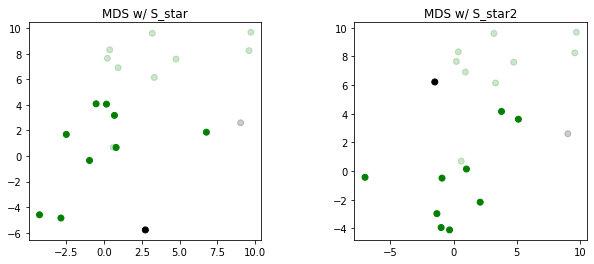

In [12]:
plot_points(S,S_star=S_star,S_star2=S_star2)

In [13]:
print(S-S_star2)

[[10.53963044  3.74810254  1.08822474  4.5950328   2.25412262  5.81036186
   7.62640336  4.24406878  1.20322141  0.69024788]
 [-3.61295963  7.45205678 11.78033077  6.06944243  9.88430456  4.08952507
   1.12417339  6.64187807 11.5934289  12.42808463]]


In [14]:
for i in range(1,n_robots-1):
    print(estimate_theta2(DM2,DM_prime,S_star,[deltaX1,deltaY1],i,verbose=0))

2.7478
3.0243
-2.9349
-2.5418
2.6666
-2.7728
2.7575
2.9794
